In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Dataset Description

In [2]:
#reading the customer data
customer_data = pd.read_csv("data/Train.csv")

In [3]:
#viewing the data frame
customer_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
# showing the general structure of dataframe
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# show the dimensions
print(f'Number of Rows: {customer_data.shape[0]}')
print(f'Number of Columns: {customer_data.shape[1]}')

Number of Rows: 8068
Number of Columns: 11


In [6]:
customer_data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

### Data Cleaning

In [7]:
# Seeing if there exist null values in the columns and listing if there are null values
customer_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
# The dataset is quite small, so we try to impute the missing values instead of removing them
# Since the age at which person get married are rather similar in general, context. We should impute ever_married with mode after grouping with age
mode_of_ever_married_by_age = customer_data.groupby("Age")['Ever_Married'].apply(lambda x:x.mode().iloc[0])

In [9]:
# replace the missing ever_married data by the mode
customer_data['Ever_Married'] = customer_data['Ever_Married'].fillna(customer_data['Age'].map(mode_of_ever_married_by_age))

In [10]:
# imputing graduated
# checking correlation between age and graduated
correlation_between_age_graduated = customer_data['Age'].corr( customer_data['Graduated'].map({'Yes': 1, 'No': 0}))
print(f'{correlation_between_age_graduated}')

0.23730934258442968


In [11]:
# since the correlation is small, there only weak correlation between age and graduation.
# so, we will just impute graduated with its mode
customer_data['Graduated'].fillna(customer_data['Graduated'].mode()[0], inplace=True)

In [12]:
# imputing profession
customer_data['Profession'].fillna(customer_data['Profession'].mode()[0], inplace=True)

In [13]:
# imputing work_experience by median
customer_data['Work_Experience'].fillna(customer_data['Work_Experience'].median(), inplace =True)

In [14]:
# imputing family size
customer_data['Family_Size'].fillna(customer_data['Family_Size'].median(), inplace =True)

In [15]:
customer_data['Var_1'].fillna(customer_data['Var_1'].mode()[0], inplace =True)

In [16]:
# From this it can be seen all the data has been imputed, and there dont exist any null values
customer_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### Data Exploration

In [20]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Count'>

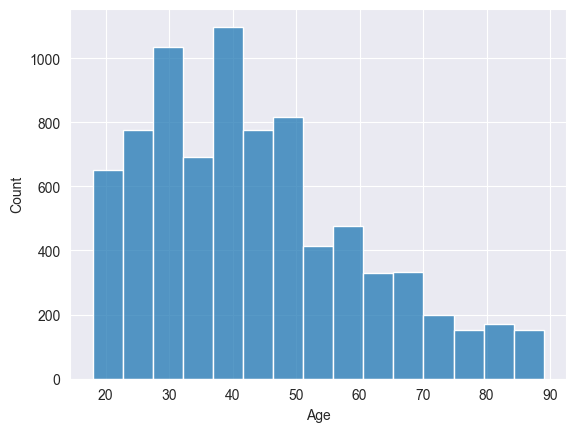

In [25]:
sns.histplot(customer_data["Age"], bins=15)

In [21]:
customer_data["Age"].describe()


count    8068.000000
mean       43.466906
std        16.711696
min        18.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        89.000000
Name: Age, dtype: float64

The distribution of Age seems to be right skewed for the dataset for the following reasons:
* The mean (43.47) is greater than the median (40). In a right-skewed distribution, the mean is typically larger than the median because the presence of higher values on the right side of the distribution pulls the mean towards the right.
* The third quartile (75th percentile) is 53, while the maximum age is 89. This indicates that there is a longer tail on the right side of the distribution, with a few relatively higher values.

This indicates that most of the customers are younger.


<Axes: xlabel='Gender', ylabel='Age'>

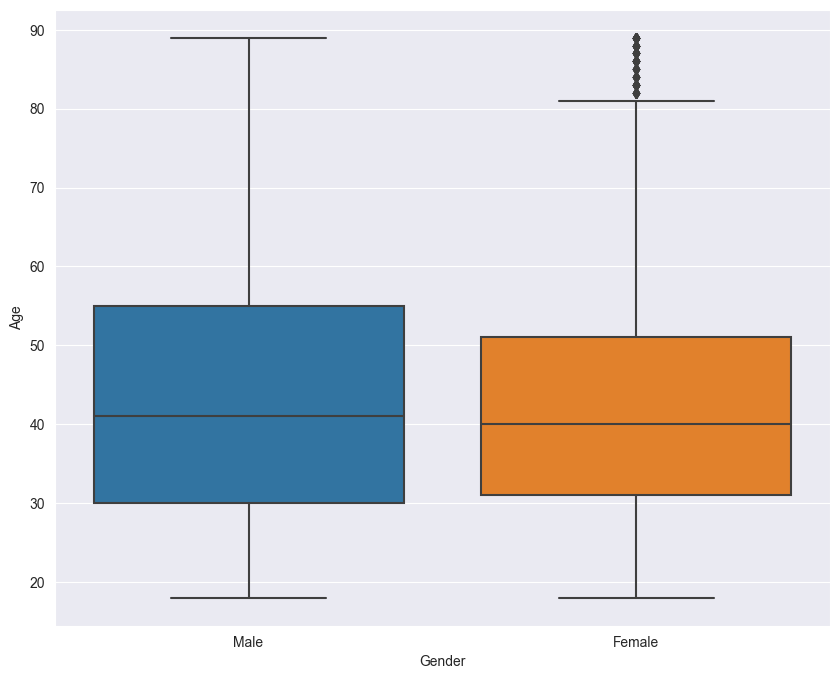

In [32]:
# What are the distribution of age by gender
plt.figure(figsize=(10,8))
sns.boxplot(customer_data,x="Gender",y="Age")

The median value seems similar around 40 for both the gender. These seems to exist some extreme cases in the case of Female.

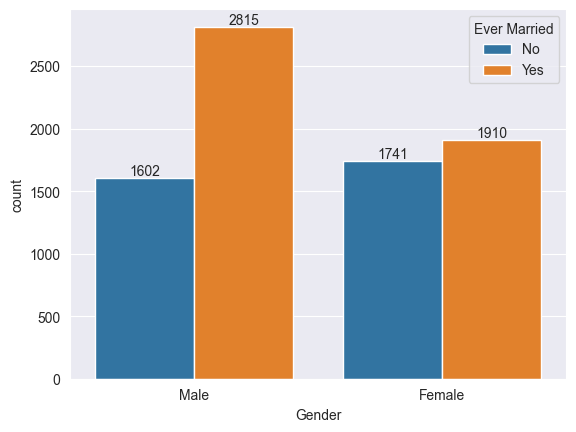

In [34]:
# Which gender shops the most?
plt.figure()
ax = sns.countplot(x='Gender', hue="Ever_Married",data=customer_data)

# add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.legend(title="Ever Married")

This shows that in this dataset, the customers are mostly male. However, it can be seen that the number of male and female customers which are in similar ranges, but number of married males is significantly higher than number of married female.

<Axes: xlabel='Segmentation', ylabel='Age'>

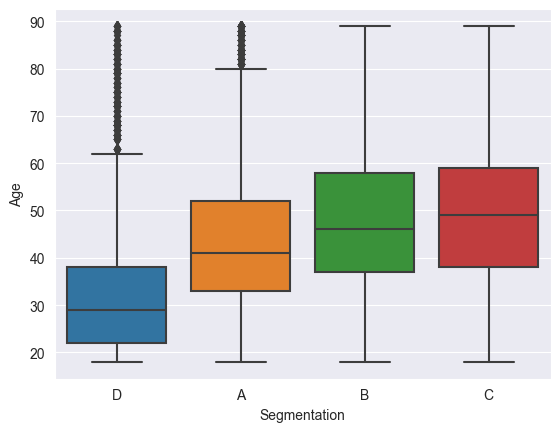

In [54]:
# does age has effect on segmentation?
sns.boxplot(data=customer_data, x="Segmentation",y="Age")

<Axes: xlabel='Gender', ylabel='Age'>

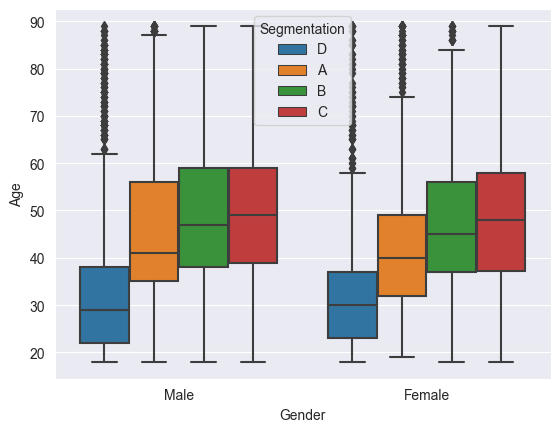

In [41]:
# Which does gender and impact the customer segmentation?
sns.boxplot(data=customer_data, x="Gender", y="Age", hue="Segmentation")


From this plot, it can be seen that distribution of age for each gender for each segment are quite similar. Thus, we cant  distinguish between segments using gender and age.

<Axes: xlabel='Ever_Married', ylabel='Age'>

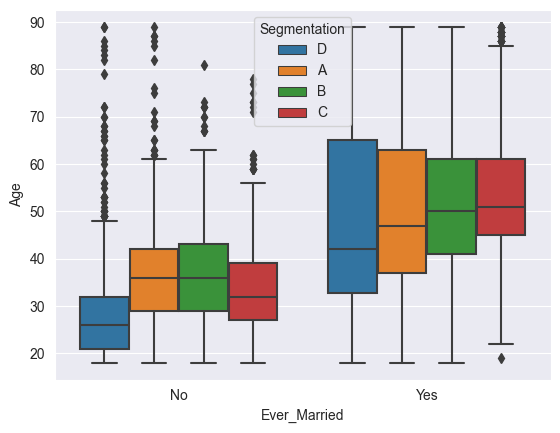

In [57]:
# How does the maritial status help in segmentation
sns.boxplot(customer_data,x="Ever_Married",y="Age", hue="Segmentation")

For this boxplot, it can be seen that the boxes are are different level for ever_married in case of segments. So it can be used for segmentation.

<Axes: xlabel='Work_Experience', ylabel='Age'>

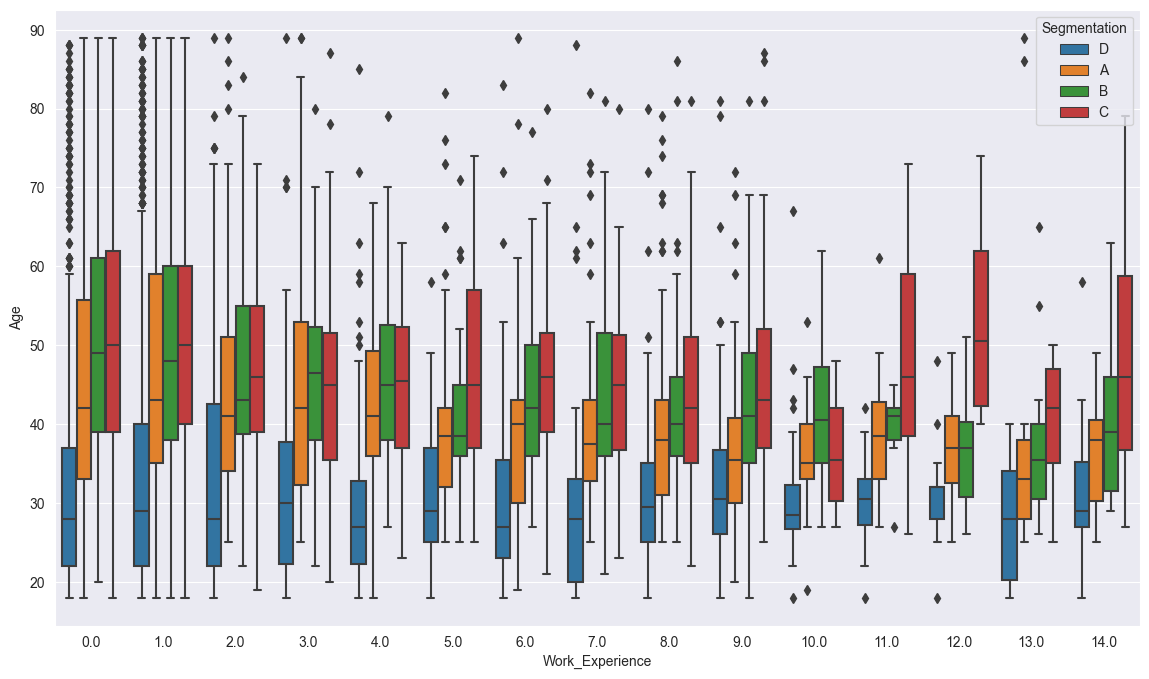

In [75]:
plt.figure(figsize=(14,8))
sns.boxplot(data=customer_data, x="Work_Experience", y="Age", hue="Segmentation")

<Axes: xlabel='Segmentation', ylabel='Work_Experience'>

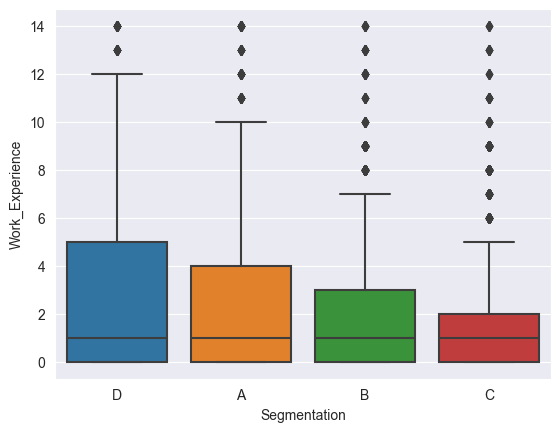

In [76]:
sns.boxplot(data=customer_data, x="Segmentation", y="Work_Experience")

In this boxplot, it can be seen that the distibution of age for work_experience are quite similar to each other, due to which it can't be used for segmentation.
Moreover, the boxplot of each segment with respect to work_experience overlap with each other, so it cant be used for segmentation.

<Axes: xlabel='Spending_Score', ylabel='count'>

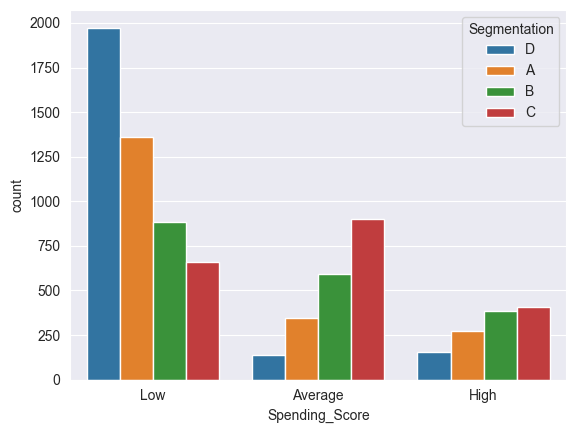

In [72]:
sns.countplot(data=customer_data, x="Spending_Score", hue="Segmentation")

Here, it can be seen that if the spending score is low, they have high frequency for segment D, so they are likely to be in D, if the value is Average, they could be C.  Thus, spending_score can be used for segmentation

<Axes: xlabel='Family_Size', ylabel='count'>

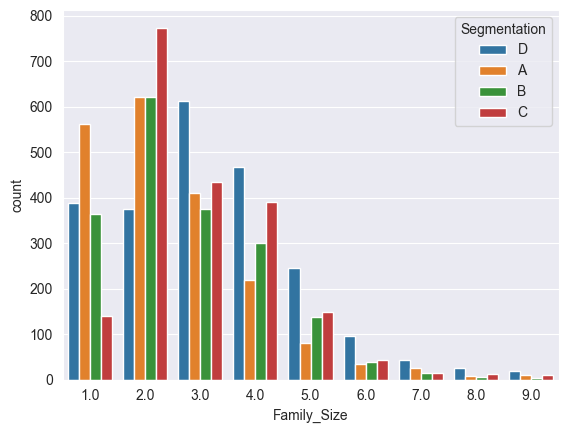

In [73]:
sns.countplot(data=customer_data, x="Family_Size", hue="Segmentation")

<Axes: xlabel='Family_Size', ylabel='Age'>

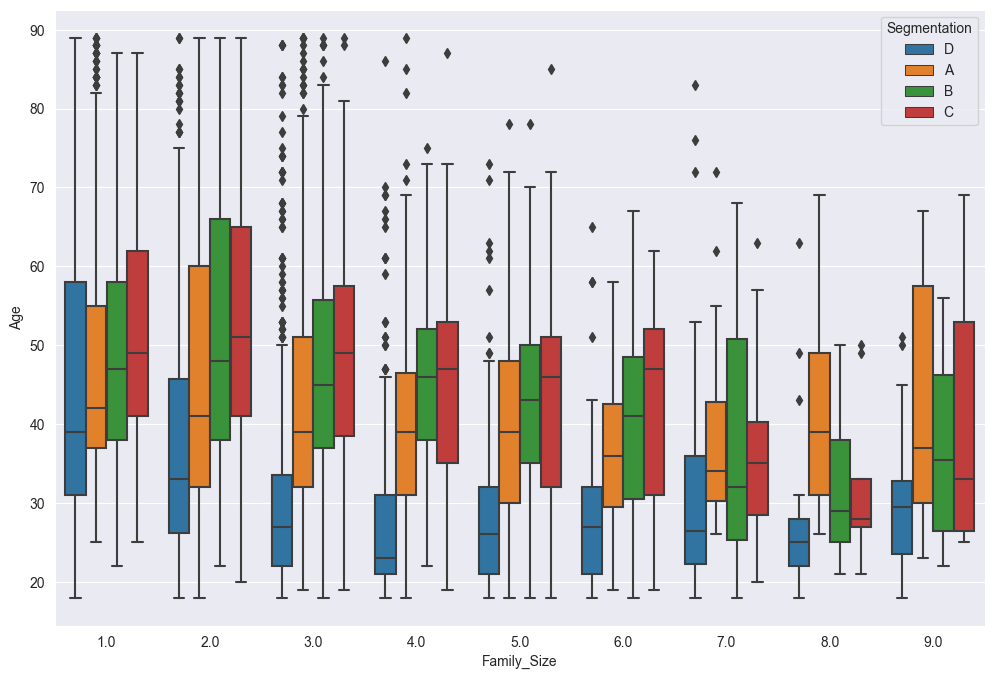

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(data=customer_data, x="Family_Size", y="Age", hue="Segmentation")

<Axes: xlabel='Profession', ylabel='count'>

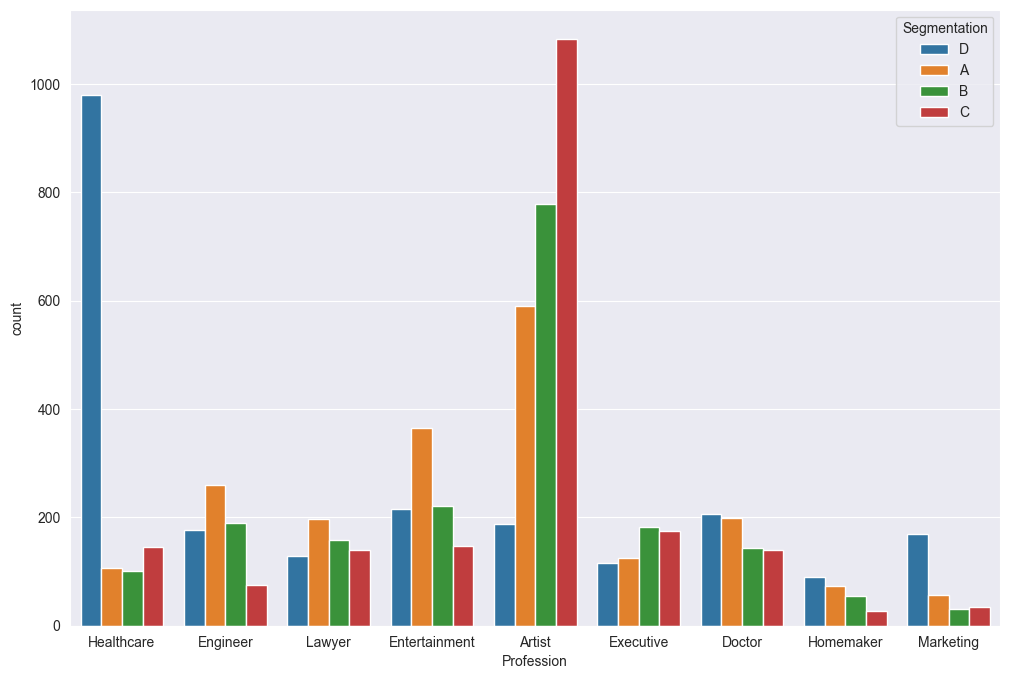

In [92]:
plt.figure(figsize=(12,8))
sns.countplot(data=customer_data, x="Profession", hue="Segmentation")

<Axes: xlabel='Profession', ylabel='Age'>

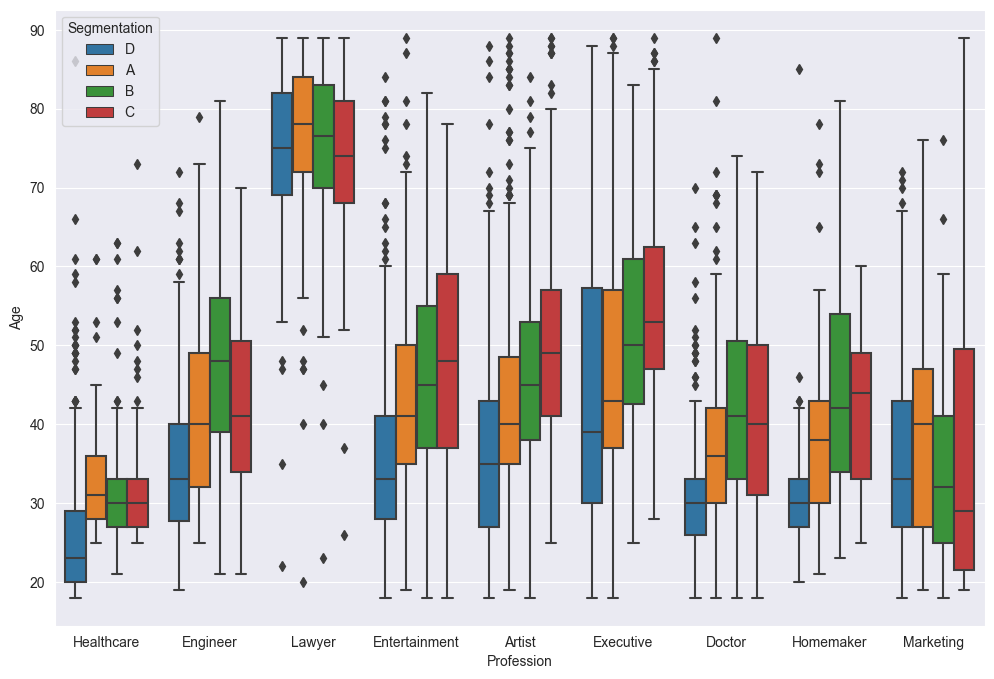

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(data=customer_data, x="Profession", y="Age", hue="Segmentation")

In the boxplot, it can be seen that for each segmentation, the distribution is different as compared to each other, with profession like Lawyer, Healthcare, etc. being significantly different from others.
On top of that, the countplot shows trend like if profession is healthcare then segmentation is more likely to be D, and if its Artist, then segmentation is likely to be C.
So this variable can help in segmentation

Thus, the variables which are more important that other for model creations are:
* Age
* Spending Score
* Family Size
* Profession
* Ever Married

So, we will build the mode using these variables. Since, the number of variables are limited, we will create another model with all the parameters